# Cleaning Data


In [1]:
#Import library yang dibutuhkan
import numpy as np #Untuk perhitungan matematik
import pandas as pd #Untuk manipulasi Dataset
import matplotlib.pyplot as plt #Untuk visualisasi
import seaborn as sns #Untuk visualisasi
from statistics import mode #Untuk mengisi missing values dengan modus

In [2]:
# Upload file

from google.colab import files
uploaded = files.upload()

Saving Dataset Kebotakan (Not Clean).csv to Dataset Kebotakan (Not Clean).csv


In [3]:
#Membaca file
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Dataset Kebotakan (Not Clean).csv']))

Selanjutnya Melihat info dataset dan cek jumlah missing Value Pada Setiap Kolom

In [5]:
#Lihat Info Dataset
print('INFO DATASET :')
df.info()
print(30*'**','\n')

print('LIHAT JUMLAH MISSING VALUE/NILAI KOSONG PADA SETIAP KOLOM')
df.isnull().sum()

INFO DATASET :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB
************************************************************ 

LIHAT JUMLAH MISSING VALUE/NILAI KOSONG PADA SETIAP KOLOM

umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

In [6]:
#Melihat data secara keseluruhan
df

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,Laki-laki,Pegawai swasta,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,SMA,9.0,0.471229
7913,34.0,Laki-laki,Pegawai swasta,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,S1,9.0,0.543821
7914,58.0,Laki-laki,Freelance,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,S2,6.0,0.643453
7915,30.0,NaN,PNS,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,S1,10.0,0.540056


Lalu selanjutnya mencari rata-rata dan modus setiap kolom, yang nantinya akan digunakan untuk mengisi missing value

In [7]:
# Treatment missing value
jenis_kelamin_mode = df['jenis_kelamin'].mode()[0]
pekerjaan_mode = df['pekerjaan'].mode()[0]
is_keturunan_mode = df['is_keturunan'].mode()[0]
sampo_mode = df['sampo'].mode()[0]
berat_mean = df['berat'].mean()
gaji_mean = df['gaji'].mean()
tinggi_mean = df['tinggi'].mean()
is_menikah_mode = df['is_menikah'].mode()[0]
is_merokok_mode = df['is_merokok'].mode()[0]
pendidikan_mode = df['pendidikan'].mode()[0]
stress_mean = df['stress'].mean()
botak_prob_mean = df['botak_prob'].mean()

# Mengisi missing value dengan nilai modus dan rata-rata
df['umur'].fillna(df['umur'].median(), inplace=True)  # Menggunakan median untuk umur
df['jenis_kelamin'].fillna(jenis_kelamin_mode, inplace=True)
df['pekerjaan'].fillna(pekerjaan_mode, inplace=True)
df['provinsi'].fillna(df['provinsi'].mode()[0], inplace=True)  # Menggunakan modus untuk provinsi
df['gaji'].fillna(gaji_mean, inplace=True)
df['is_menikah'].fillna(is_menikah_mode, inplace=True)
df['is_keturunan'].fillna(is_keturunan_mode, inplace=True)
df['berat'].fillna(berat_mean, inplace=True)
df['tinggi'].fillna(tinggi_mean, inplace=True)
df['sampo'].fillna(sampo_mode, inplace=True)
df['is_merokok'].fillna(is_merokok_mode, inplace=True)
df['pendidikan'].fillna(pendidikan_mode, inplace=True)
df['stress'].fillna(stress_mean, inplace=True)
df['botak_prob'].fillna(botak_prob_mean, inplace=True)

Mengisi Missing Value

In [8]:
# Mengisi Missing Value
kolom_missing = ['jenis_kelamin','pekerjaan','is_keturunan','berat','sampo','gaji']
inputan = [jenis_kelamin_mode, pekerjaan_mode, is_keturunan_mode, berat_mean, sampo_mode, gaji_mean]

for kolom, inputan in zip(kolom_missing, inputan):
    df[kolom].fillna(inputan, inplace=True)

Selanjutnya cek ulang missing value pada setiap kolom

In [9]:
print('CEK ULANG MISSING VALUE')
df.isnull().sum()

CEK ULANG MISSING VALUE


umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

Selanjutnya yaitu membuang outlier pada kolom numerik.
Kolom gaji tidak akan saya gunakan untuk seterusnya

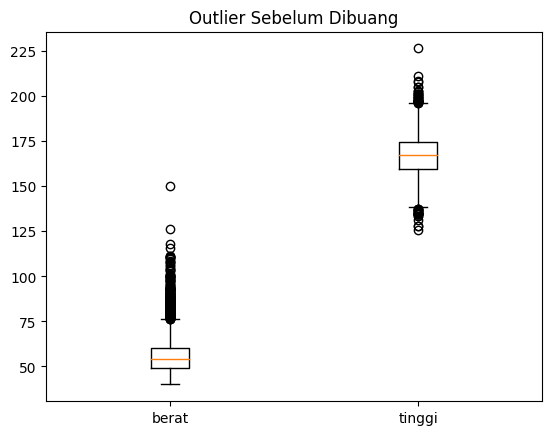

Jumlah Baris dengan outlier : 7917


In [10]:
kolom_numerik = ['berat', 'tinggi']
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Outlier Sebelum Dibuang')
plt.show()
print(f'Jumlah Baris dengan outlier : {df.shape[0]}')

Selanjutnya yaitu membuang outlier, sekaligus kita cek ulang

In [11]:
# Buang Outlier
# Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

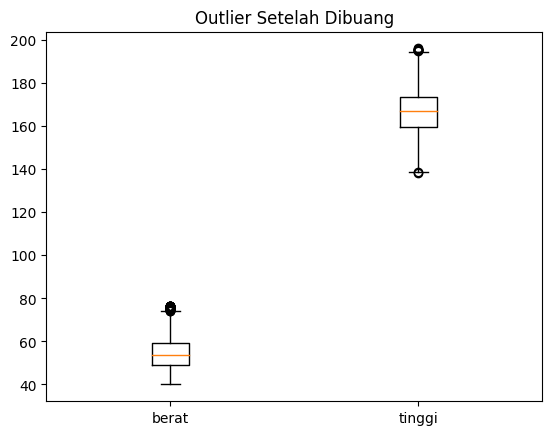

Jumlah Baris Tanpa Outlier : 7584


In [12]:
# Cek Ulang
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Outlier Setelah Dibuang')
plt.show()
print(f'Jumlah Baris Tanpa Outlier : {df.shape[0]}')

# Visualisasi Data

In [13]:
#Import Library yang dibutuhkan
import seaborn as sns
from matplotlib.lines import Line2D
sns.set_style('darkgrid')

Grafik Distribusi Kolom Berat, tinggi, dan umur

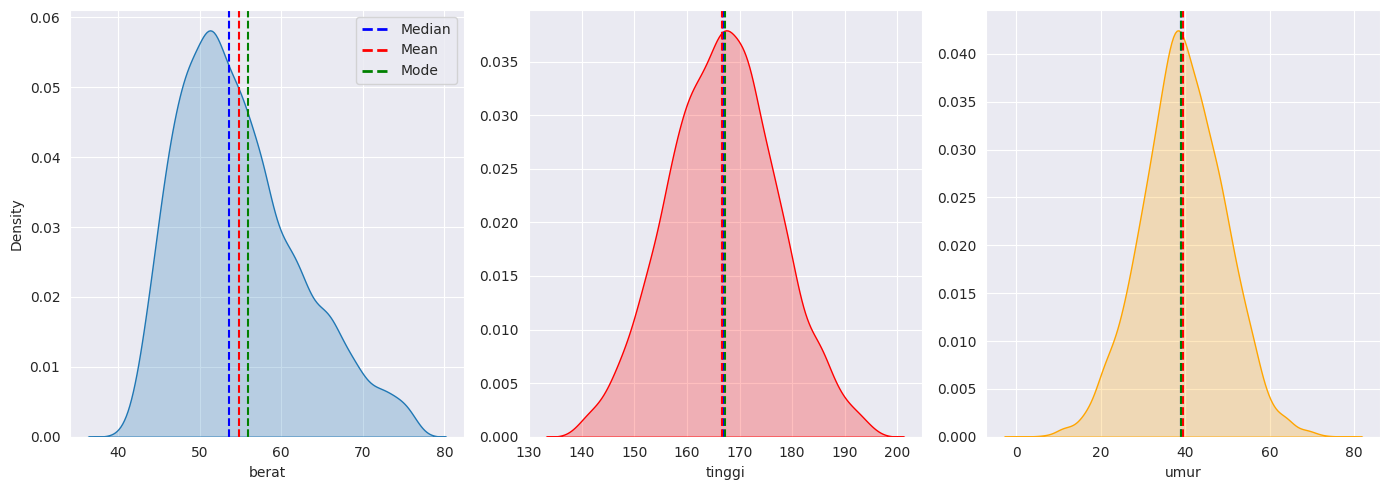

In [14]:
#Distribusi Berat dan Tinggi
fig, axs = plt.subplots(1, 3, figsize=(14,5))
# Plot Berat
sns.kdeplot(data=df, x="berat", ax=axs[0], fill=True)
axs[0].axvline(x=df.berat.median(), color='blue', ls='--', lw=1.5)
axs[0].axvline(x=df.berat.mean(), color='red', ls='--', lw=1.5)
axs[0].axvline(x=df.berat.mode()[0], color='green', ls='--', lw=1.5)

colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
labels = ['Median', 'Mean', 'Mode']
axs[0].legend(lines, labels)

# Plot Tinggi
sns.kdeplot(data=df, x="tinggi", ax=axs[1], fill=True, color='red')
axs[1].axvline(x=df.tinggi.median(), color='blue', ls='--', lw=1.5)
axs[1].axvline(x=df.tinggi.mean(), color='red', ls='--', lw=1.5)
axs[1].axvline(x=df.tinggi.mode()[0], color='green', ls='--', lw=1.5)
axs[1].set_ylabel('')


axs[1].annotate('Median dan\nmean', xy =(156.2, 0.0663),
                xytext =(141.1, 0.0579),
                arrowprops = dict(arrowstyle = "->", color='black'), fontsize=10)

# Plot Umur
sns.kdeplot(data=df, x="umur", ax=axs[2], fill=True, color='orange')
axs[2].axvline(x=df.umur.median(), color='blue', ls='--', lw=1.5)
axs[2].axvline(x=df.umur.mean(), color='red', ls='--', lw=1.5)
axs[2].axvline(x=df.umur.mode()[0], color='green', ls='--', lw=1.5)
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()

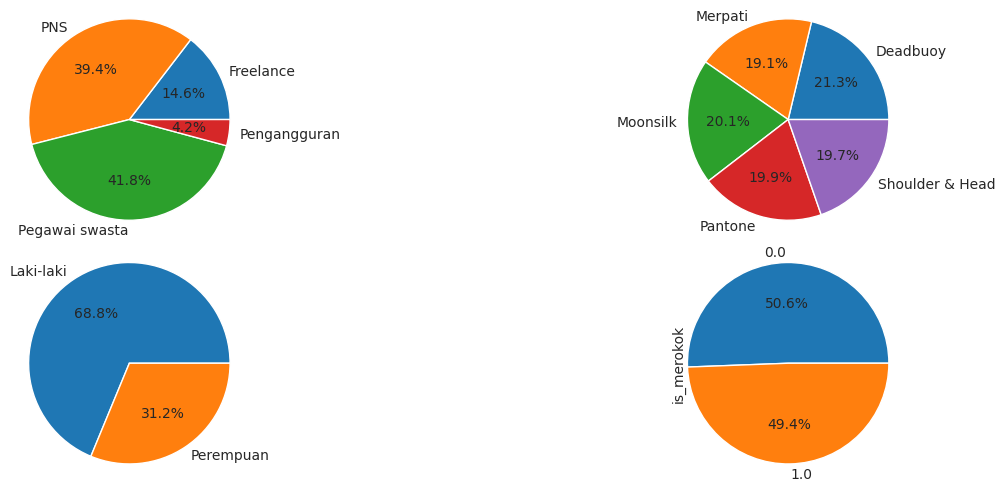

In [15]:
#Ratio Pie Chart (pekerjaan, sampo, jenis kelamin, is_merokok)
fig2, axs2 = plt.subplots(2,2, figsize=(15,5))

df.groupby('pekerjaan').size().plot(kind='pie', ax=axs2[0,0], autopct = '%.1f%%', radius=1.3)
df.groupby('sampo').size().plot(kind='pie', ax=axs2[0,1], autopct = '%.1f%%', radius=1.3)
df.groupby('jenis_kelamin').size().plot(kind='pie', ax=axs2[1,0], autopct = '%.1f%%', radius=1.3)
df.groupby('is_merokok').size().plot(kind='pie', ax=axs2[1,1], autopct = '%.1f%%', radius=1.3)
axs2[0,0].set_ylabel('')
axs2[0,1].set_ylabel('')
axs2[1,0].set_ylabel('')
axs2[1,1].set_ylabel('is_merokok')
plt.tight_layout()
plt.show()

Lalu menganalis orang yang memiliki probabilitas botak di atas 70%

In [16]:
#Slicing
#Data khusus probabilitas botak tinggi (>70%)
prob_botak_70 = df[df['botak_prob'] >= 0.7]

In [17]:
prob_botak_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 3 to 7908
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           1701 non-null   float64
 1   jenis_kelamin  1701 non-null   object 
 2   pekerjaan      1701 non-null   object 
 3   provinsi       1701 non-null   object 
 4   gaji           1701 non-null   float64
 5   is_menikah     1701 non-null   float64
 6   is_keturunan   1701 non-null   float64
 7   berat          1701 non-null   float64
 8   tinggi         1701 non-null   float64
 9   sampo          1701 non-null   object 
 10  is_merokok     1701 non-null   float64
 11  pendidikan     1701 non-null   object 
 12  stress         1701 non-null   float64
 13  botak_prob     1701 non-null   float64
dtypes: float64(9), object(5)
memory usage: 199.3+ KB


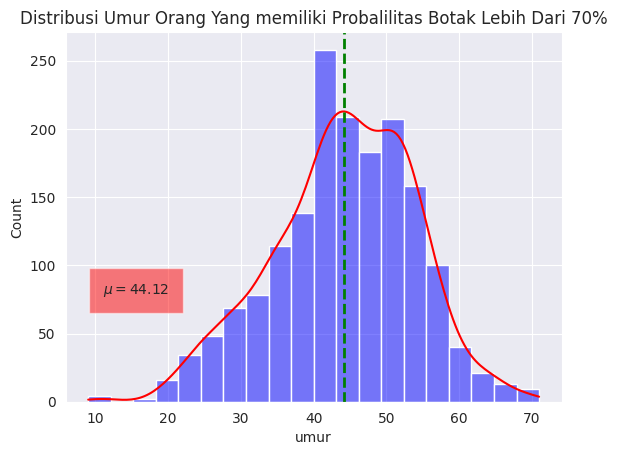

In [18]:
# UMUR
fig3, axs3 = plt.subplots()
sns.histplot(prob_botak_70, x='umur', bins=20, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red')
axs3.axvline(x=prob_botak_70.umur.mean(), color='green', ls='--', lw=2)
axs3.text(11, 79, r'$\mu={}$'.format('%.2f' % prob_botak_70['umur'].mean()), style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axs3.set_title('Distribusi Umur Orang Yang memiliki Probalilitas Botak Lebih Dari 70%')
plt.show()

Orang yang memiliki probabilitas botak tinggi memiliki umur kisaran 40 sampai 50-an

Countplot orang yang sudah menikah atau belum dan orang yang merokok atau tidak

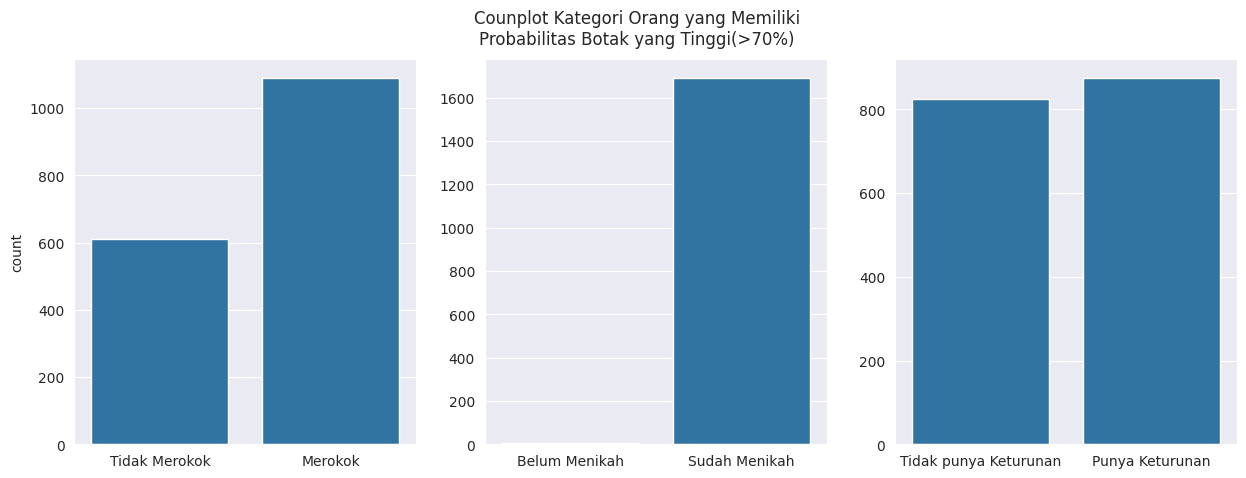

In [19]:
fig4, axs4 = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=prob_botak_70, x='is_merokok', ax=axs4[0])
axs4[0].set_xticks([0, 1], ['Tidak Merokok','Merokok'])
axs4[0].set_xlabel('')

sns.countplot(data=prob_botak_70, x='is_menikah', ax=axs4[1])
axs4[1].set_xticks([0, 1], ['Belum Menikah','Sudah Menikah'])
axs4[1].set_xlabel('')
axs4[1].set_ylabel('')

sns.countplot(data=prob_botak_70, x='is_keturunan', ax=axs4[2])
axs4[2].set_xticks([0, 1], ['Tidak punya Keturunan','Punya Keturunan'])
axs4[2].set_xlabel('')
axs4[2].set_ylabel('')
fig4.suptitle('Counplot Kategori Orang yang Memiliki\nProbabilitas Botak yang Tinggi(>70%)')

plt.show()

Orang yang merokok, belum menikah, dan punya keturunan memiliki probabilitas botak yang lebih tinggi

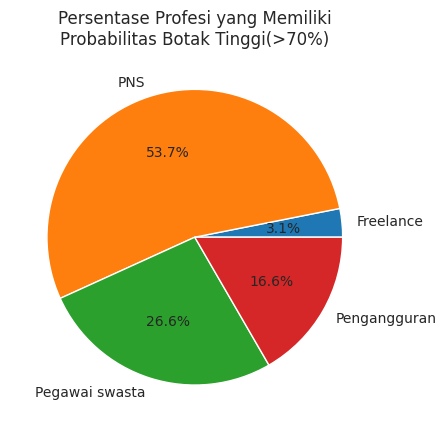

In [20]:
prob_botak_70.groupby('pekerjaan').size().plot(kind='pie', autopct='%.1f%%')
plt.title('Persentase Profesi yang Memiliki\nProbabilitas Botak Tinggi(>70%)')
plt.ylabel('')
plt.show()

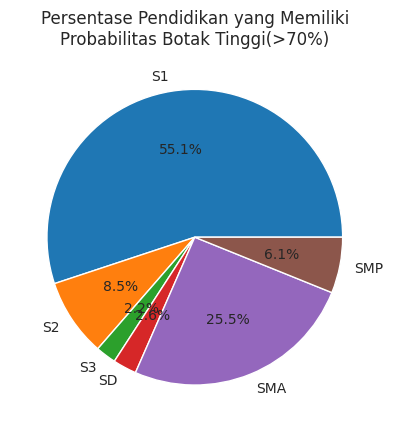

In [21]:
prob_botak_70.groupby('pendidikan').size().plot(kind='pie', autopct='%.1f%%')
plt.title('Persentase Pendidikan yang Memiliki\nProbabilitas Botak Tinggi(>70%)')
plt.ylabel('')
plt.show()

# Machine Learning (Regression)

Merubah Kolom Kategorik menjadi numerik

In [22]:
# Label Encoding
# Kolom-kolom yang akan di-Label Encoding
kolom_kategorik = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan']

# Membuat peta mapping untuk setiap kolom kategorikal
gender_map = {'Laki-laki': 1, 'Perempuan': 0}  # Mapping jenis kelamin ke angka 1 dan 0
pekerjaan_map = {'Freelance': 0, 'PNS': 1, 'Pegawai swasta': 2, 'Pengangguran': 3}  # Mapping pekerjaan ke angka 0, 1, 2, 3
sampo_map = {'Deadbuoy': 0, 'Merpati': 1, 'Moonsilk': 2, 'Pantone': 3, 'Shoulder & Head': 4}  # Mapping sampo ke angka 0, 1, 2, 3, 4
pendidikan_map = {'SD': 0, 'SMP': 1, 'SMA': 2, 'S1': 3, 'S2': 4, 'S3': 5}  # Mapping pendidikan ke angka 0, 1, 2, 3, 4, 5

# Menyusun peta-peta mapping ke dalam satu variabel list
my_map = [gender_map, pekerjaan_map, sampo_map, pendidikan_map]

# Melakukan Label Encoding untuk setiap kolom kategorikal
for kolom, my_map in zip(kolom_kategorik, my_map):
    df[kolom] = df[kolom].map(my_map)

<ipython-input-22-4dcff82894be>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kolom] = df[kolom].map(my_map)
<ipython-input-22-4dcff82894be>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kolom] = df[kolom].map(my_map)
<ipython-input-22-4dcff82894be>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [23]:
df.isnull()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7911,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7912,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7913,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7914,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Membagi data ke kolom features dan label. Lalu split menjadi data training dan testing

In [24]:
#Bagi data ke features dan label
#kolom gaji dan provinsi tidak dibutuhkan
X = df[['umur','jenis_kelamin','pekerjaan','is_menikah','is_keturunan','berat','tinggi','sampo','is_merokok','pendidikan']] #Kolom Features
y = df['botak_prob'] #Kolom class/label

# Split data ke training(75%) dan testing(25%).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Selanjutnya saya akan memakai beberapa model sekaligus lalu memilih model yang memiliki peforma paling bagus

In [25]:
#Coba model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Import library untuk evaluasi
from sklearn.metrics import mean_squared_error


Tahap selanjutnya yaitu pemodelan, dan membuat scatter plot untuk perbandingan nilai aktual dan nilai prediksi

Hasil Evaluasi Regresi Linear
MSE: 0.014601001910552896
RSME: 0.12083460560018763
----------------------------------------
Hasil Evaluasi Decision Tree
MSE: 0.015224686999038374
RSME: 0.123388358442109
----------------------------------------
Hasil Evaluasi Random Forest
MSE: 0.008153882702589443
RSME: 0.09029885216651119
----------------------------------------
Hasil Evaluasi Support Vector Regression
MSE: 0.02079470014363688
RSME: 0.1442036759019578
----------------------------------------


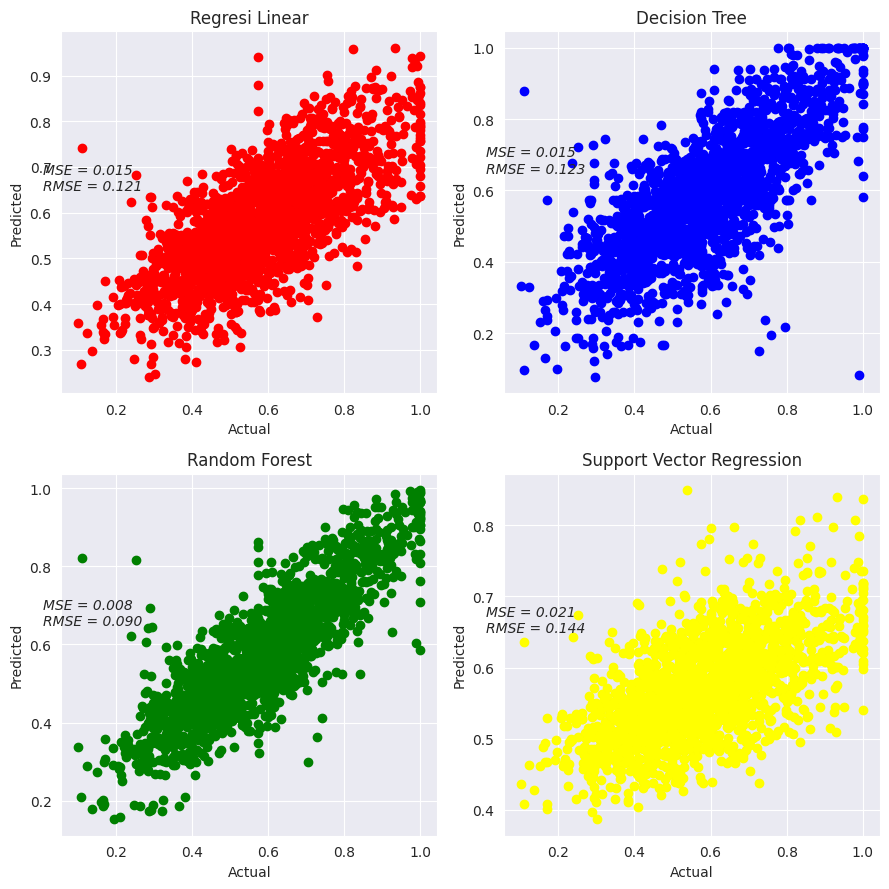

In [26]:
#Modeling
my_model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
model_name = ['Regresi Linear', 'Decision Tree', 'Random Forest','Support Vector Regression']

#Untuk Visualisasi Scatter Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
my_axs = [ax1,ax2,ax3,ax4]
my_color = ['red','blue','green','yellow']

for modeling, name, myaxs, mycolor in zip(my_model, model_name, my_axs, my_color):
    #Proses Training
    model = modeling
    model = model.fit(X_train, y_train)

    #Proses prediksi, Hasil prediksi disimpan kedalam variabel y_pred
    y_pred = model.predict(X_test)

    #Evaluasi dengan MSE dan RMSE, Semakin kecil semakin bagus
    # MSE
    print(f"Hasil Evaluasi {name}")
    mse = mean_squared_error(y_test, y_pred)
    print('MSE:', mse)

    # RMSE
    rmse = np.sqrt(mse)
    print('RSME:', rmse)
    print(20*'--')

    #Scatter plot perbandingan nilai prediksi dengan nilai aktual
    myaxs.scatter(y_test, y_pred, color=mycolor)
    myaxs.set_title(name)
    myaxs.set_xlabel('Actual')
    myaxs.set_ylabel('Predicted')
    myaxs.text(0.01, 0.65, f"MSE = {'%.3f' % mse}\nRMSE = {'%.3f' % rmse}", style='italic')


plt.tight_layout()
plt.show()


Bedasarkan plot dan nilai rmse di atas, random forest memiliki peforma paling baik.
Selanjutnya menyimpan model agar model dapat digunakan untuk prediksi tanpa training ulang

In [27]:
import pickle
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)
pickle.dump(forest, open('forest.pkl', 'wb'))


# Memakai Model

In [28]:
#Membuat fungsi preprocessing untuk label encoding data yang baru masuk
def Preprocess(data):

    # Label Encoding
    kolom_kategorik = ['jenis_kelamin','pekerjaan','sampo','pendidikan']

    gender_map = ({'Laki-laki' : 1,
                   'Perempuan' : 0})
    pekerjaan_map = ({'Freelance' : 0,
                      'PNS' : 1,
                      'Pegawai swasta' : 2,
                      'Pengangguran' : 3})
    sampo_map = ({'Deadbuoy' : 0,
                  'Merpati' : 1,
                  'Moonsilk' :2,
                  'Pantone' : 3,
                  'Shoulder & Head' : 4})
    pendidikan_map = ({'SD' : 0,
                       'SMP' : 1,
                       'SMA' : 2,
                       'S1' : 3,
                       'S2': 4,
                       'S3': 5})

    my_map = [gender_map,pekerjaan_map,sampo_map,pendidikan_map]

    for kolom,my_map in zip(kolom_kategorik, my_map):
        data[kolom] = data[kolom].map(my_map)

    X = ['umur','jenis_kelamin','pekerjaan','is_menikah','is_keturunan','berat','tinggi','sampo','is_merokok','pendidikan']
    return data[X]

Masukan data baru yang ingin diprediksi ke dalam dataframe. Simpan dalam variabel new_df

In [32]:
nw = pd.DataFrame({'umur' : [22],
                       'jenis_kelamin' : 'Perempuan',
                       'pekerjaan' : 'Pegawai swasta',
                       'provinsi' : 'Jakarta',
                       'is_menikah' : [0],
                       'is_keturunan' : [0],
                       'berat' : [55],
                       'tinggi' : [155],
                       'sampo' : 'Pantone',
                       'is_merokok' : [0],
                       'pendidikan' : 'S1'}).reset_index()

print('Data Baru')
nw

Data Baru


,index,umur,jenis_kelamin,pekerjaan,provinsi,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan
0,0,22,Perempuan,Pegawai swasta,Jakarta,0,0,55,155,Pantone,0,S1


Menampilkan hasil inputan setelah dimasukan ke dalam fungsi preprocess

In [33]:
new_df = Preprocess(nw)
new_df

,umur,jenis_kelamin,pekerjaan,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan
0,22,0,2,0,0,55,155,3,0,3


Memanggil Model dan melakukan prediksi

In [34]:
#Import Model yang sudah ditrain dan disave sebelumnya
forest_model = pickle.load(open('./forest.pkl', 'rb'))

prediksi = float(forest_model.predict(new_df))

print('Kemungkinan Botak Adalah : ', '{:.1%}'.format(prediksi))

Kemungkinan Botak Adalah :  31.2%


<ipython-input-34-0482b5b54a2a>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediksi = float(forest_model.predict(new_df))
